<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5: Temporal Databases - Representation, Creation, and Statistics


## Install the PAMI repository

In [1]:
!pip install PAMI

zsh:1: command not found: pip


## Downloading a sample database

In [2]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv

--2025-06-17 14:18:10--  https://web-ext.u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv
Resolving web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)... 163.143.103.34
Connecting to web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)|163.143.103.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606762 (4.4M) [text/csv]
Saving to: ‘Temporal_T10I4D100K.csv’

Temporal_T10I4D100K 100%[===================>]   4.39M  6.93MB/s    in 0.6s    

2025-06-17 14:18:11 (6.93 MB/s) - ‘Temporal_T10I4D100K.csv’ saved [4606762/4606762]



## Creating a synthetic transactional database

### Generic



```python
from PAMI.extras.syntheticDataGenerator \
    import TemporalDatabase as db
  
obj = db.TemporalDatabase(
        databaseSize=totalTransactions,
        avgItemsPerTransaction=avergeNumberOfItemsToAppearInATransaction,
        numItems=numberOfItemsInADatabase,
        occurrenceProbabilityAtSameTimestamp=probabilityWithWhichTheNextTransactionMustOccurAtTheSameTimestamp,
        occurrenceProbabilityToSkipSubsequentTimestamp=probabilityWithWithTheNextTimestampHasTobeSkipped,
        sep='\t'
        )
obj.create()
obj.save('temporalDatabase.csv')
#read the generated transactions into a dataframe
temporalDataFrame=obj.getTransactions()
#stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [3]:
from PAMI.extras.syntheticDataGenerator \
    import TemporalDatabase as db

obj = db.TemporalDatabase(
        databaseSize=100000,
        avgItemsPerTransaction=10,
        numItems=1000,
        occurrenceProbabilityOfSameTimestamp=0,
        occurrenceProbabilityToSkipSubsequentTimestamp=0,
        sep='\t'
        )
obj.create()
obj.save('temporalDatabase.csv')
#read the generated transactions into a dataframe
temporalDataFrame=obj.getTransactions()
#stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 5.491246938705444
Memory (RSS): 157696000
Memory (USS): 133644288


## Converting a dataframe into a temporal database

### Generic



```python
from PAMI.extras.convert import DF2DB as alg

obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(oFile='outputFileName', condition='>=|>|==|!=|<|<=', thresholdValue=thresholdValue)

print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [4]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 5 x 5 dataframe with random values
data = np.random.randint(1, 100, size=(5, 5))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4', 'Item5']
            )
# Adding a timestamp column with specific values
timestamps = [1, 3, 3, 5, 8]
dataFrame.insert(0, 'timestamp', timestamps)

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(oFile='temporalDB.csv',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.001728057861328125
Memory (RSS): 183418880
Memory (USS): 148013056


## Printing the Statistical Details

### Generic



```python
from PAMI.extras.dbStats import TemporalDatabase as stat

obj = stat.TemporalDatabase("inputFileName")
obj.run()
obj.printStats()
obj.plotGraphs()
```



### Example 3

Database size : 100000
Number of items : 1000
Minimum Transaction Size : 0
Average Transaction Size : 10.0
Maximum Transaction Size : 21
Minimum Inter Arrival Period : 1
Average Inter Arrival Period : 1.0
Maximum Inter Arrival Period : 1
Minimum periodicity : 494
Average periodicity : 744.308
Maximum periodicicty : 1367
Standard Deviation Transaction Size : 5.772503789518028
Variance : 33.322133221332216
Sparsity : 0.99


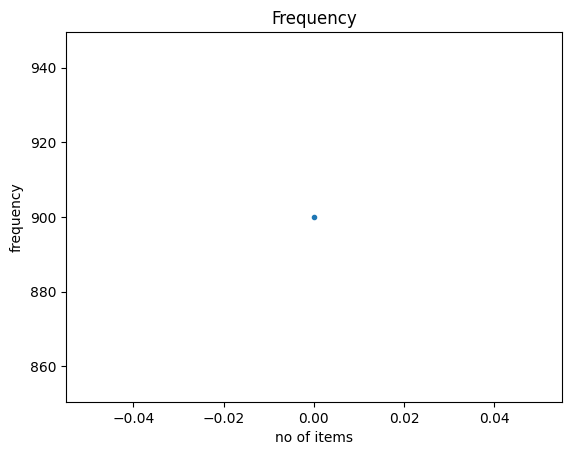

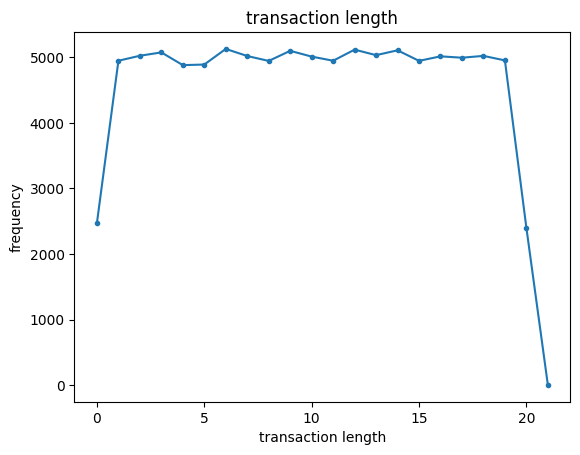

In [5]:
from PAMI.extras.dbStats import TemporalDatabase as stat

obj = stat.TemporalDatabase("temporalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()